In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Loading the training and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Projet Intégré S8 (Tweets Réchauffement Climatique)/train_preprocessed.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Projet Intégré S8 (Tweets Réchauffement Climatique)/test_preprocessed.csv")

Mounted at /content/drive


In [8]:
train_df['Polarity'].value_counts()/len(train_df)

Polarity
 1.0    0.649852
-1.0    0.350148
Name: count, dtype: float64

In [9]:
from imblearn.over_sampling import RandomOverSampler

# Separate input features (X) and target variable (y)
X = train_df.drop('Polarity', axis=1)
y = train_df['Polarity']

# Apply oversampling
oversample = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

# Combine oversampled X and y into a new balanced DataFrame
train_df = pd.concat([X_oversampled, y_oversampled], axis=1)

# Shuffle the dataset
train_df = train_df.sample(frac=1, random_state=42)

# Check the distribution of the target variable
train_df['Polarity'].value_counts()/len(train_df)

Polarity
 1.0    0.5
-1.0    0.5
Name: count, dtype: float64

In [10]:
train_df

,Date,User,Tweet,Preprocessed_Tweet,Polarity
365,2023-03-30 22:44:08+00:00,montreal110,Neuf espèces animales pourraient aider à limit...,neuf espèce animal pouvoir aider limiter récha...,1.0
655,2023-03-30 07:30:04+00:00,mawzideilan,Le mépris dans les yeux de Brunel est à vomir\...,mépris oeil brunel vomir \r\n ce monsieur con...,1.0
828,2023-03-31 14:21:05+00:00,Shuyaftw,"@Mediavenir Après le covid, la variole du sing...",après covid variole sing guerre ukrain réchauf...,-1.0
692,2023-03-30 19:11:32+00:00,Machinequisait,#macron qui parle de sécheresse et de réchauff...,macron parle sécheress réchauffement climatiqu...,-1.0
213,2023-03-31 10:24:48+00:00,DuGalissa,@ndiayes12 Possible que l’explication ne soit ...,possible explication bien étayer rareter poiss...,1.0
...,...,...,...,...,...
106,2023-03-31 15:02:24+00:00,thoemmalex,"Eh ouais, le réchauffement climatique c'est pa...",eh ouai réchauffement climatique bretagne ...,1.0
270,2023-03-31 08:33:43+00:00,MonniauxD,Je vois un parlementaire affirmer vouloir lutt...,voir parlementaire affirmer vouloir lutter con...,-1.0
860,2023-03-30 20:37:43+00:00,LascauxJose,@MaryMbois Arnaque pénuries arnaque !!!!!!! Co...,arnaqu pénurie arnaqu covid ukrain réchauf...,-1.0
435,2023-03-30 19:06:04+00:00,Rigautnicosslas,@clairemado06 @silvano_trotta oui le sud-est a...,oui sud habitud part cela gèl couille ...,-1.0


In [11]:
# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df["Preprocessed_Tweet"],
                                                  train_df["Polarity"], test_size=0.15,
                                                  random_state=42,stratify=train_df["Polarity"])
#When stratify is set to a dataframe column, in this case train_df["Polarity"],
#it means that the data will be split in a way that maintains the same proportion
#of the different column classes in both the training and validation sets as in the original dataset.

# Checking the distribution of the target variable in the training and validation sets
y_train.value_counts()/len(y_train)

Polarity
 1.0    0.5
-1.0    0.5
Name: count, dtype: float64

In [12]:
y_val.value_counts()/len(y_val)

Polarity
-1.0    0.5
 1.0    0.5
Name: count, dtype: float64

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_df["Tweet"])

# Trying Multinomial Naive Bayes

In [15]:
# Create a Multinomial Naive Bayes classifier object
NB = MultinomialNB()

# Define the range of alpha values to test
alpha_values = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]

# Set up grid search to find the best alpha value
grid_search = GridSearchCV(NB, {'alpha': alpha_values}, cv=150, n_jobs=4)

# Train the grid search object on the training set
grid_search.fit(X_train_vec, y_train)

# Retrieve the best model from the grid search
best_NB = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred = best_NB.predict(X_val_vec)

# Calculate and print the validation accuracy
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.8484848484848485


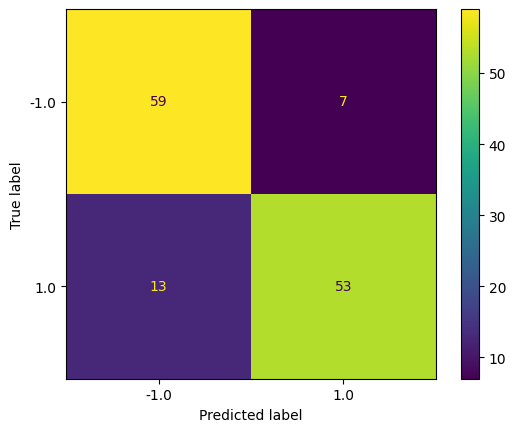

In [16]:
ConfusionMatrixDisplay.from_predictions(y_val,y_val_pred)

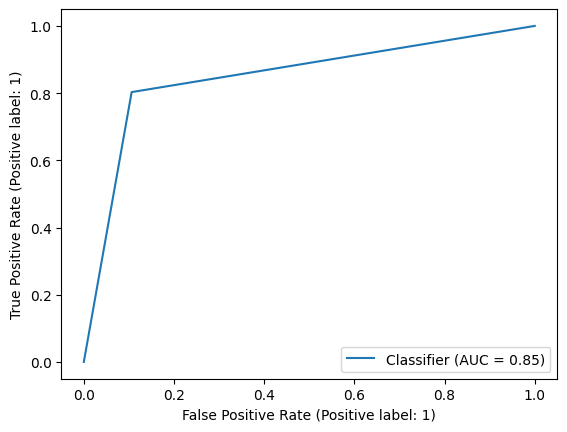

In [17]:
RocCurveDisplay.from_predictions(y_val, y_val_pred)

# Trying SVM

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an SVM classifier object
svm = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Set up grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=150, n_jobs=4)

# Train the grid search object on the training set
grid_search.fit(X_train_vec, y_train)

# Retrieve the best model from the grid search
best_svm = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred = best_svm.predict(X_val_vec)

# Calculate and print the validation accuracy
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.8636363636363636


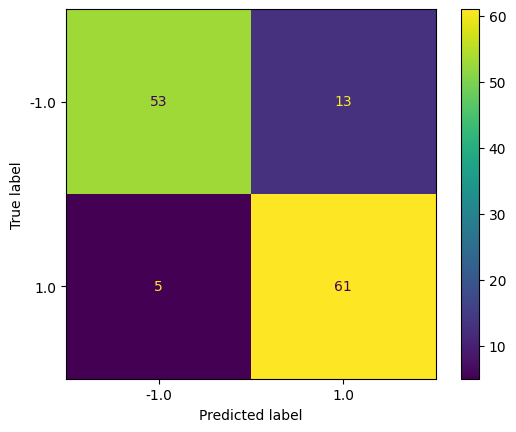

In [19]:
ConfusionMatrixDisplay.from_predictions(y_val,y_val_pred)

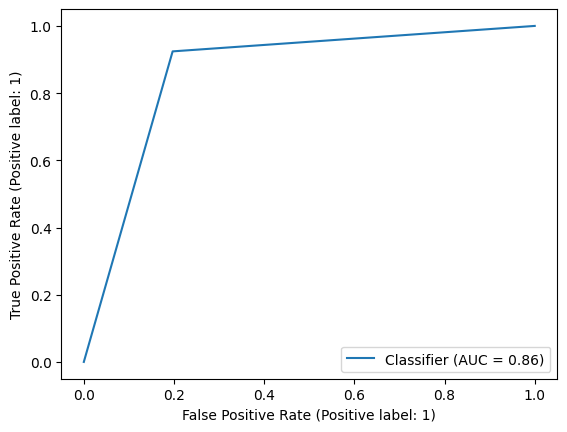

In [20]:
RocCurveDisplay.from_predictions(y_val, y_val_pred)

# Trying RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object
rf = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Set up grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=10, n_jobs=4)

# Train the grid search object on the training set
grid_search.fit(X_train_vec, y_train)

# Retrieve the best model from the grid search
best_rf = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred = best_rf.predict(X_val_vec)

# Calculate and print the validation accuracy
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.8560606060606061


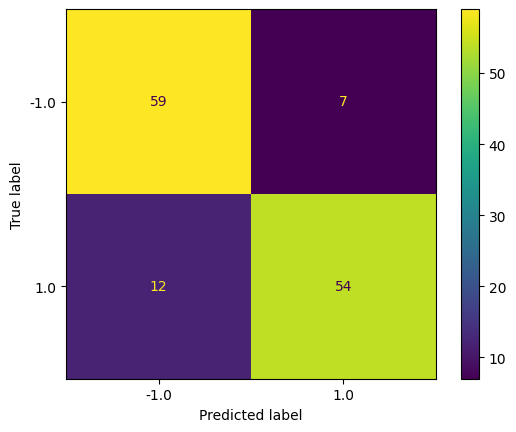

In [22]:
ConfusionMatrixDisplay.from_predictions(y_val,y_val_pred)

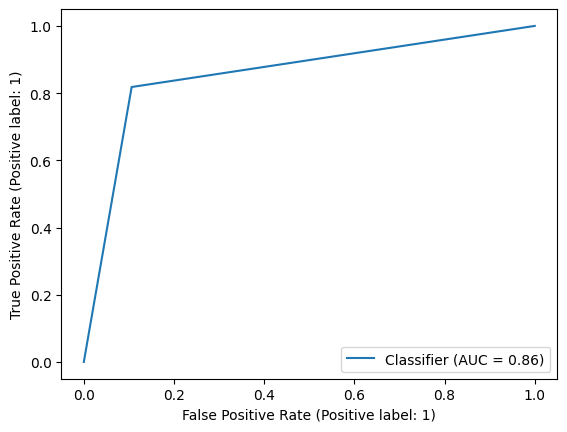

In [23]:
RocCurveDisplay.from_predictions(y_val, y_val_pred)